In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import scipy.stats

In [3]:
data_la = pd.read_csv("LA_Listings.csv", encoding='latin1')

In [4]:
data_ny=pd.read_csv("NY_Listings.csv", encoding='latin1')

In [5]:
data = pd.read_csv("airbnb_ratings_new.csv", encoding='latin1')

In [6]:
pd.set_option('display.max_columns', 4) #df에서 컬럼 개수 설정

In [7]:
data_la['City']

0        Los Angeles
1        Los Angeles
2        Los Angeles
3        Los Angeles
4        Los Angeles
            ...     
59860    Los Angeles
59861    Los Angeles
59862    Los Angeles
59863    Los Angeles
59864    Los Angeles
Name: City, Length: 59865, dtype: object

In [8]:
data_ny['City']

0            Bronx
1            Bronx
2            Bronx
3            Bronx
4            Bronx
           ...    
75744     Brooklyn
75745       Queens
75746     Brooklyn
75747     Brooklyn
75748    Manhattan
Name: City, Length: 75749, dtype: object

In [9]:
data_us = data[data['Country'] == 'United States']
data_us['City']

490                  ___
502                  ___
595        San Francisco
602          Los Angeles
616                  ___
               ...      
1048514      Los Angeles
1048520              NaN
1048545              NaN
1048566              NaN
1048574      Los Angeles
Name: City, Length: 143954, dtype: object

In [10]:
data_lany = data_la.append(data_ny)
df_final = data_us.append(data_lany)
df_final # df_final은 미국데이터 + 뉴욕데이터 + la데이터 = 미국데이터

,Listing ID,Name,...,Review Scores Value,Reviews per month
490,4581256.0,Beacon hill small bedroom (__),...,9.0,2.10
502,3967592.0,Minutes to Boston-Near Beach 71-3,...,10.0,0.95
595,12205354.0,Artsy apartment near Moscone Center,...,9.0,5.22
602,11085215.0,_________,...,0.0,0.00
616,4625517.0,GreenT&bus stops in front of door,...,NaN,NaN
...,...,...,...,...,...
75744,42806780.0,Male share room long term,...,0.0,0.00
75745,42815083.0,Jfk flight attendant crashpad,...,0.0,0.00
75746,42831981.0,Double-Bed in Sunset Park/Industry City,...,0.0,0.00
75747,42862086.0,(B6) BedStuy/Bushwick Shared Basement,...,0.0,0.00


In [11]:
# df_final.duplicated() 메서드를 사용하면 모든 컬럼의 값이 동일한 경우를 중복으로 간주
duplicate_rows = df_final[df_final.duplicated()]

# 중복된 행 출력
print("Duplicate Rows except first occurrence:")
print(duplicate_rows)

Duplicate Rows except first occurrence:
       Listing ID                                               Name  ...  \
19526  10173750.0                 Modern; bright Lower East Side 2BR  ...   
19530  10175187.0                  Large bedroom in a cozy apartment  ...   
19531  10175678.0    Great Apartment; Lower East Side (Top Location)  ...   
19533  10176679.0                                      Redford Rooms  ...   
19535  10177753.0  In the heart of the heart of the Lower East Side!  ...   
...           ...                                                ...  ...   
39629  19840462.0                West Village Townhouse in Manhattan  ...   
39631  19841329.0                 Quintessential 1BR W. Village Apt!  ...   
39632  19841564.0         Bright and Comfortable 1br in West Village  ...   
39633  19841625.0                   Private Room in the West Village  ...   
39634  19841797.0                Charming Studio in the West Village  ...   

       Review Scores Value Reviews 

In [12]:
#6595개의 중복행 제거

In [13]:
df_final = df_final.drop_duplicates()
print(df_final)

       Listing ID                                              Name  ...  \
490     4581256.0                    Beacon hill small bedroom (__)  ...   
502     3967592.0                 Minutes to Boston-Near Beach 71-3  ...   
595    12205354.0               Artsy apartment near Moscone Center  ...   
602    11085215.0                                         _________  ...   
616     4625517.0                 GreenT&bus stops in front of door  ...   
...           ...                                               ...  ...   
75744  42806780.0                         Male share room long term  ...   
75745  42815083.0                     Jfk flight attendant crashpad  ...   
75746  42831981.0           Double-Bed in Sunset Park/Industry City  ...   
75747  42862086.0             (B6) BedStuy/Bushwick Shared Basement  ...   
75748  42881423.0  TIME SQUARE 43rd Street->Single Bed on 1st floor  ...   

       Review Scores Value Reviews per month  
490                    9.0              

In [14]:
#taget값인 Price 그래프 확인

<Axes: xlabel='Price', ylabel='Density'>

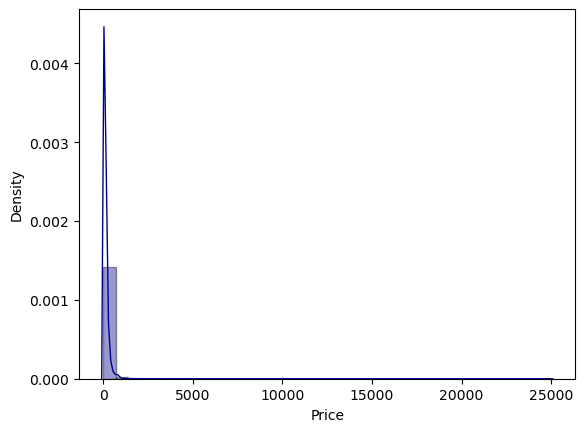

In [15]:
sns.distplot(df_final['Price'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})

<Axes: xlabel='Price', ylabel='Density'>

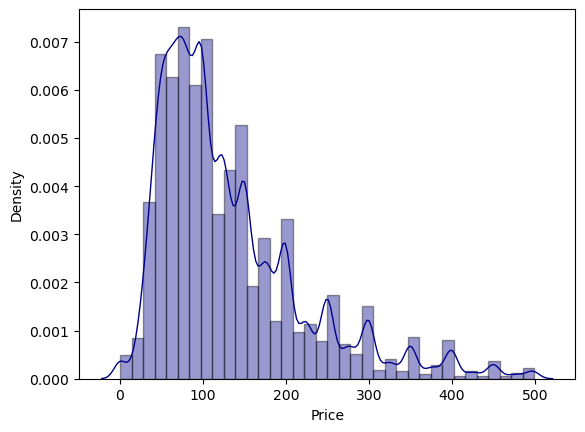

In [16]:
PriceFilteredData = df_final[df_final['Price'] < 500]

# Density Plot and Histogram of variable "Price"
sns.distplot(PriceFilteredData['Price'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})

In [17]:
#컬럼간 상관관계 알아보기 pearson

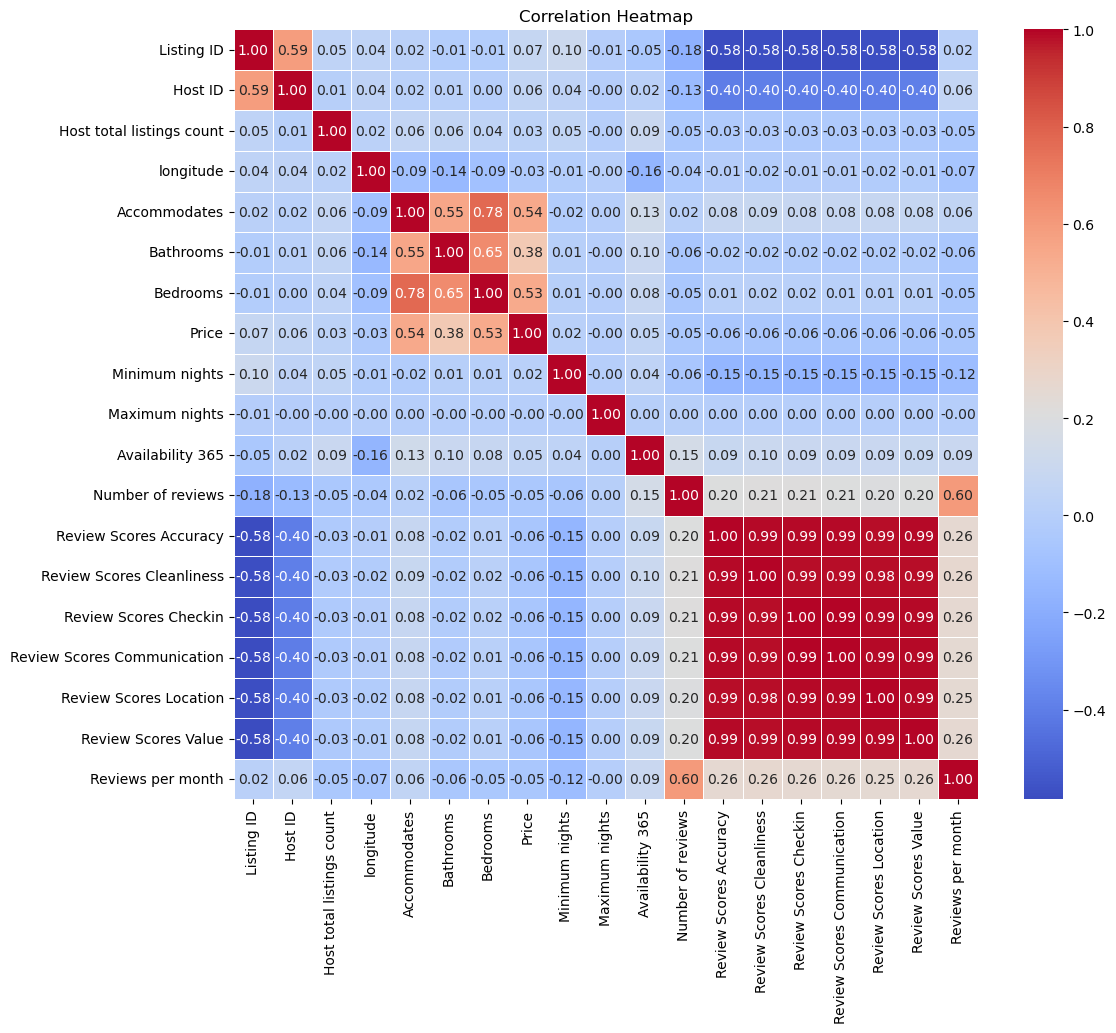

In [18]:
correlation_matrix = df_final.corr(method='pearson')

# Heatmap 생성
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [19]:
#컬럼간 상관관계 알아보기 spearman

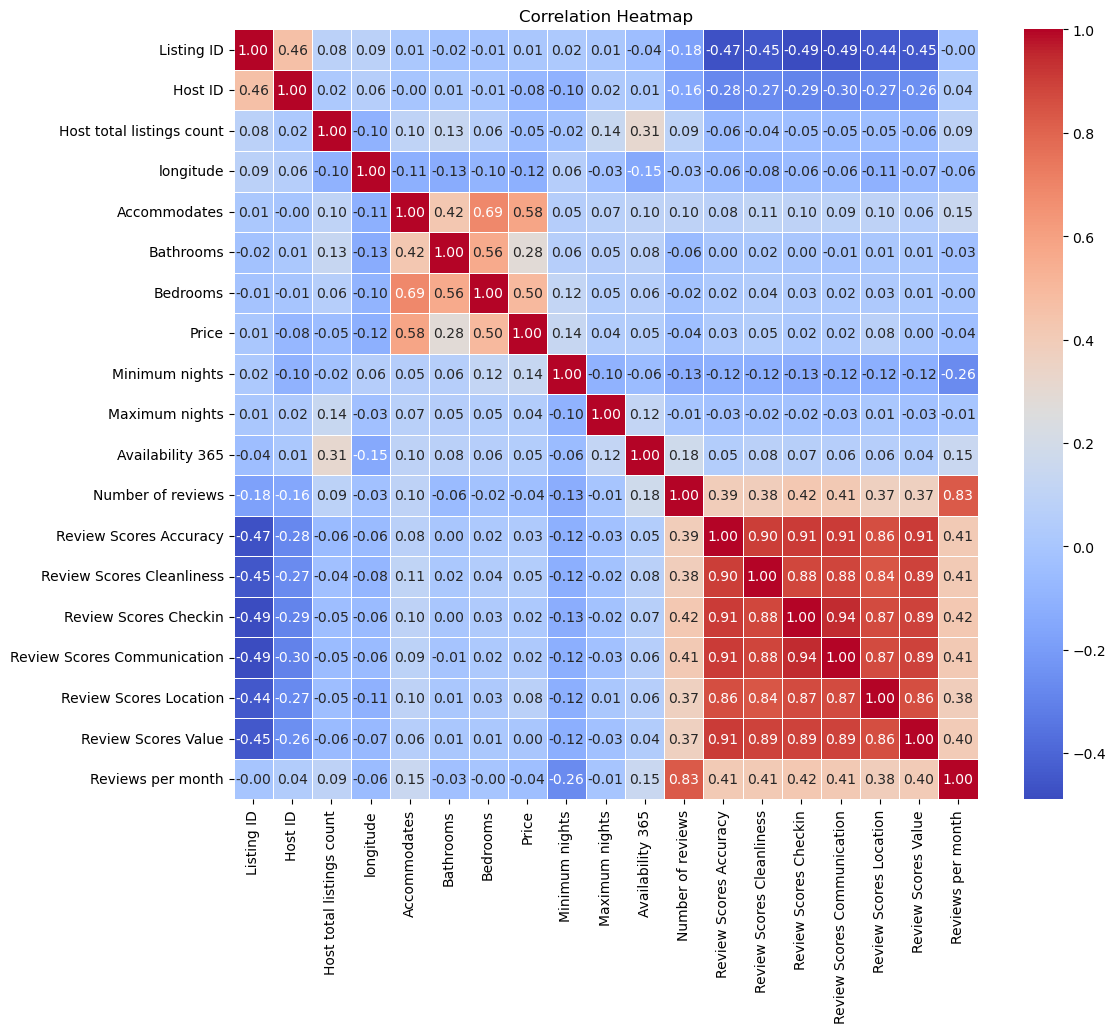

In [20]:
correlation_matrix = df_final.corr(method='spearman')

# Heatmap 생성
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [21]:
# Price와 상관관계가 있다고 직관적으로 판단되는 얘들은 Accommodates,Bathrooms, Bedrooms 

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [23]:
#결측치 제거 NA행 전부 제거

In [24]:
df_final.dropna(axis=0, how='any', inplace=True)

In [25]:
df_final.describe

<bound method NDFrame.describe of        Listing ID                                               Name  ...  \
490     4581256.0                     Beacon hill small bedroom (__)  ...   
502     3967592.0                  Minutes to Boston-Near Beach 71-3  ...   
595    12205354.0                Artsy apartment near Moscone Center  ...   
632     3230382.0   Large master bedroom & covered patio; __________  ...   
640    10491563.0                     ___downtown____soma__loft_____  ...   
...           ...                                                ...  ...   
44301  21176357.0                            Studio apartment in NYC  ...   
44303  21176433.0                        Glorious Mornings Townhouse  ...   
44305  21177066.0                 1-Bdrm Entire Apartment St. George  ...   
44306  21177156.0  2Br Private Penthouse Loft.Near Ferry! WaterVi...  ...   
44308  21177575.0                      NICE COLONIAL OLD WORLD CHARM  ...   

       Review Scores Value Reviews per mo

In [26]:
#범주형 변수 확인

In [33]:
features=['Country','Property type']
# 각 열의 데이터 타입 확인
for column in features:
    data_type = df_final[column].dtype
    print(data_type)

object
object


In [34]:
#country와 Property type가 변수형 타입, onehot encoding

In [35]:
df_final.columns

Index(['Listing ID', 'Name', 'Host ID', 'Host Name', 'Host Response Rate',
       'Host Is Superhost', 'Host total listings count', 'Street', 'City',
       'Neighbourhood cleansed', 'State', 'Country', 'latitude', 'longitude',
       'Property type', 'Room type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Amenities', 'Price', 'Minimum nights', 'Maximum nights',
       'Availability 365', 'Calendar last scraped', 'Number of reviews',
       'Last Review Date', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Reviews per month'],
      dtype='object')

In [36]:
df_final = pd.get_dummies(df_final, columns=['Country', 'Property type'], drop_first=True)

In [37]:
df_final.columns

Index(['Listing ID', 'Name', 'Host ID', 'Host Name', 'Host Response Rate',
       'Host Is Superhost', 'Host total listings count', 'Street', 'City',
       'Neighbourhood cleansed', 'State', 'latitude', 'longitude', 'Room type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Amenities', 'Price',
       'Minimum nights', 'Maximum nights', 'Availability 365',
       'Calendar last scraped', 'Number of reviews', 'Last Review Date',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Reviews per month',
       'Property type_Bed & Breakfast', 'Property type_Boat',
       'Property type_Boutique hotel', 'Property type_Bungalow',
       'Property type_Cabin', 'Property type_Camper/RV',
       'Property type_Castle', 'Property type_Cave', 'Property type_Chalet',
       'Property type_Condominium', 'Property type_Dorm',
       'Prop

In [38]:
#country 없어져서 나중에 경도 위도로 대체?

In [39]:
features = ['Accommodates', 'Bathrooms', 'Bedrooms', 'Review Scores Location','Property type_Bed & Breakfast', 'Property type_Boat',
       'Property type_Boutique hotel', 'Property type_Bungalow',
       'Property type_Cabin', 'Property type_Camper/RV',
       'Property type_Castle', 'Property type_Cave', 'Property type_Chalet',
       'Property type_Condominium', 'Property type_Dorm',
       'Property type_Earth House', 'Property type_Guest suite',
       'Property type_Guesthouse', 'Property type_Hostel',
       'Property type_House', 'Property type_Hut', 'Property type_In-law',
       'Property type_Island', 'Property type_Loft',
       'Property type_Nature lodge', 'Property type_Other',
       'Property type_Plane', 'Property type_Serviced apartment',
       'Property type_Tent', 'Property type_Timeshare', 'Property type_Tipi',
       'Property type_Townhouse', 'Property type_Train',
       'Property type_Treehouse', 'Property type_Vacation home',
       'Property type_Villa', 'Property type_Yurt']
target = 'Price'

X = df_final[features]
y = df_final[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge Regression
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge_reg = Ridge()
grid_ridge = GridSearchCV(ridge_reg, ridge_params, scoring='neg_mean_squared_error', cv=5)
grid_ridge.fit(X_train_scaled, y_train)

best_alpha_ridge = grid_ridge.best_params_['alpha']
ridge_reg = Ridge(alpha=best_alpha_ridge)
ridge_reg.fit(X_train_scaled, y_train)
pred_ridge = ridge_reg.predict(X_test_scaled)

rmse_ridge = mean_squared_error(y_test, pred_ridge, squared=False)
print("Ridge Regression RMSE:", rmse_ridge)

# Lasso Regression
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
lasso_reg = Lasso()
grid_lasso = GridSearchCV(lasso_reg, lasso_params, scoring='neg_mean_squared_error', cv=5)
grid_lasso.fit(X_train_scaled, y_train)

best_alpha_lasso = grid_lasso.best_params_['alpha']
lasso_reg = Lasso(alpha=best_alpha_lasso)
lasso_reg.fit(X_train_scaled, y_train)
pred_lasso = lasso_reg.predict(X_test_scaled)

rmse_lasso = mean_squared_error(y_test, pred_lasso, squared=False)
print("Lasso Regression RMSE:", rmse_lasso)

Ridge Regression RMSE: 91.71743659555341
Lasso Regression RMSE: 91.71716279385365
